In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [42]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [43]:
df.info

<bound method DataFrame.info of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..           

In [44]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [45]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [46]:
df = df.rename({'Undergrad':'under_grad', 'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income',
                    'City.Population':'city_population', 'Work.Experience':'work_experience', 'Urban':'urban'}, axis = 1)
df.head()

,under_grad,marital_status,taxable_income,city_population,work_experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [47]:
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
sns.pairplot(df)

In [49]:
for n in df.columns:
    print(n)
    sns.boxplot(df[n])
    plt.show()

under_grad


TypeError: Horizontal orientation requires numeric `x` variable.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


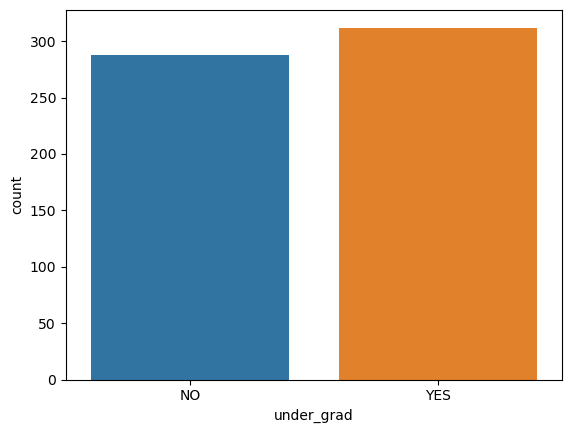

In [14]:
sns.countplot(df['under_grad'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


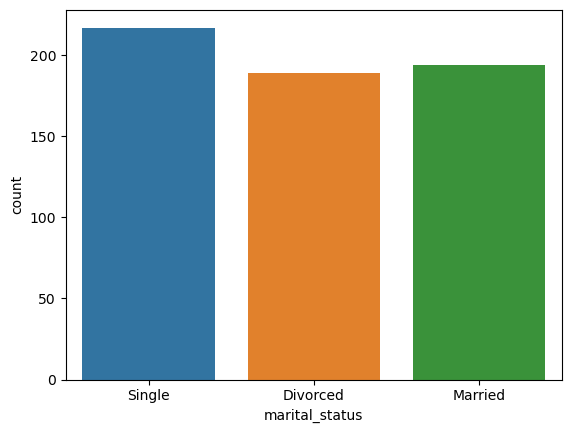

In [15]:
sns.countplot(df['marital_status'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


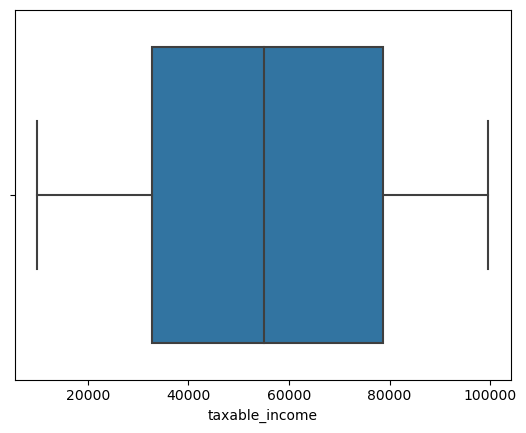

In [16]:
sns.boxplot(df['taxable_income'])
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


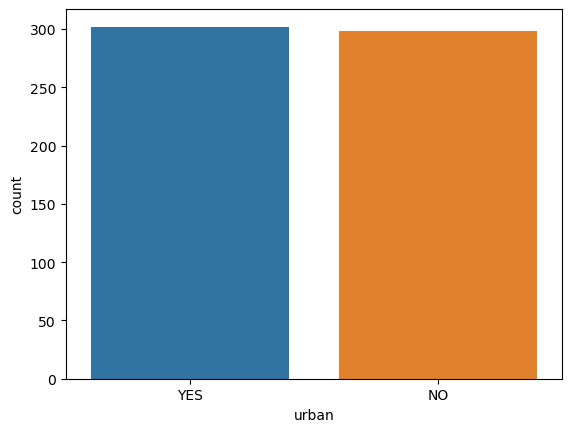

In [17]:
sns.countplot(df['urban'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


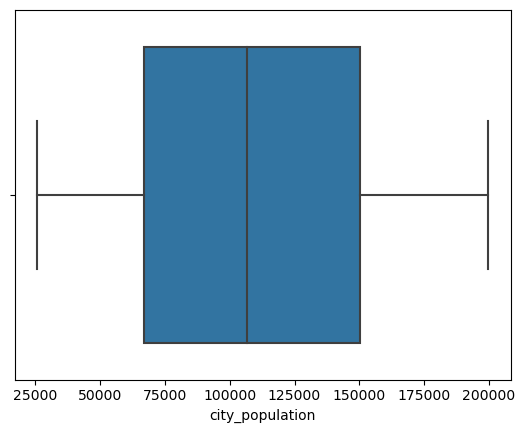

In [18]:
sns.boxplot(df['city_population'])
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


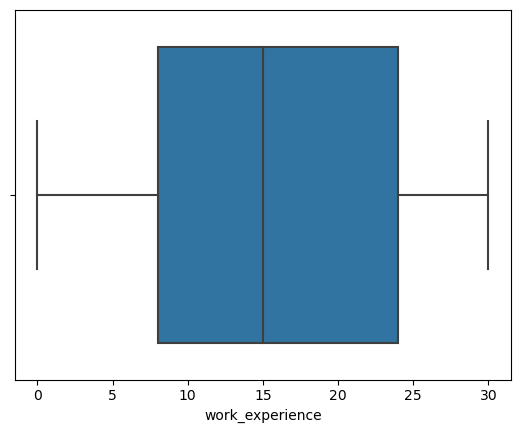

In [19]:
sns.boxplot(df['work_experience'])
plt.show()

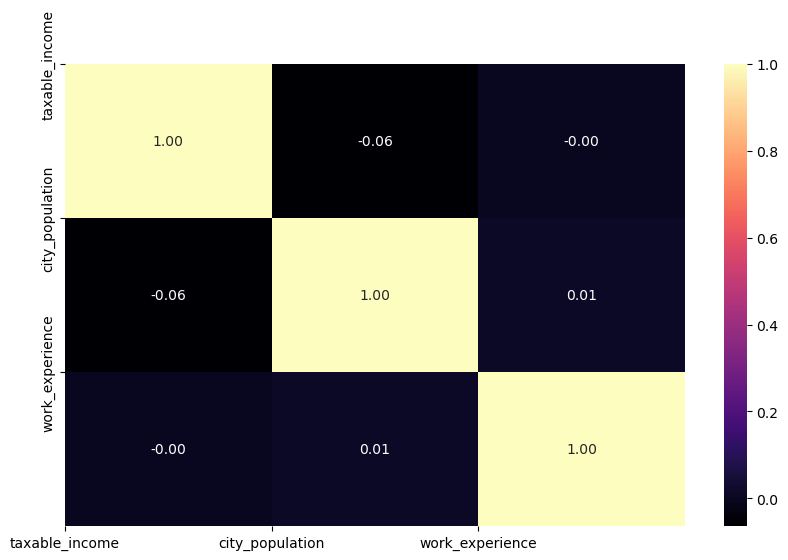

In [21]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [22]:
df = pd.get_dummies(df)
df.head()

,taxable_income,city_population,work_experience,under_grad_NO,under_grad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,urban_NO,urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [23]:
df['taxable_category'] = pd.cut(x = df['taxable_income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df

,taxable_income,city_population,work_experience,under_grad_NO,under_grad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,urban_NO,urban_YES,taxable_category
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Good
596,69967,55369,2,0,1,1,0,0,0,1,Good
597,47334,154058,0,1,0,1,0,0,0,1,Good
598,98592,180083,17,0,1,0,1,0,1,0,Good


In [25]:
data = df.drop('taxable_income', axis = 1)
data

,city_population,work_experience,under_grad_NO,under_grad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,urban_NO,urban_YES,taxable_category
0,50047,10,1,0,0,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,Good
2,160205,30,1,0,0,1,0,0,1,Good
3,193264,15,0,1,0,0,1,0,1,Good
4,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,Good
596,55369,2,0,1,1,0,0,0,1,Good
597,154058,0,1,0,1,0,0,0,1,Good
598,180083,17,0,1,0,1,0,1,0,Good


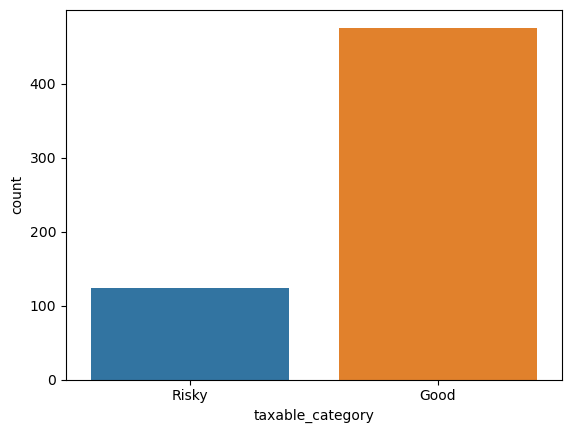

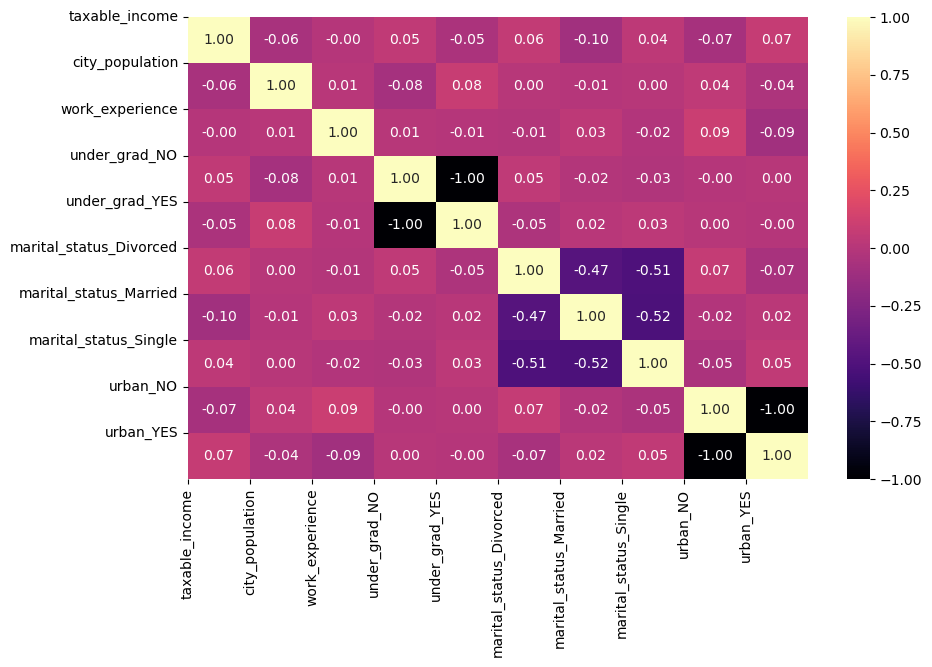

In [29]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [30]:
X = data.drop('taxable_category', axis = 1)
y = data['taxable_category']
X

,city_population,work_experience,under_grad_NO,under_grad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,urban_NO,urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [31]:
y 

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: taxable_category, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(402, 9)
(198, 9)
(402,)
(198,)


In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 'auto'
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [36]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
skfolds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
skfolds

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [38]:
results = cross_val_score(model, x_train, y_train, cv=skfolds)
print(results.mean())

0.7514024390243902


In [39]:
from sklearn.ensemble import BaggingClassifier

skfolds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42)
results = cross_val_score(model, x_train, y_train, cv=skfolds)
print(results.mean())

0.7614634146341464


In [40]:
from sklearn.ensemble import BaggingClassifier

skfolds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42)
results = cross_val_score(model, x_train, y_train, cv=skfolds)
print(results.mean())

0.7614634146341464
